### Hessianのコーナー検出

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hessian corner detection
def Hessian_corner(img):
    
    # grayscale
    def BGR2GRAY(img):
        gray = 0.2126*img[...,2] + 0.7152*img[...,1] + 0.0722*img[...,0]
        gray = gray.astype(np.uint8)
        return gray
    
# sobel
    def sobel_filtering(gray):
        # get shape
        H,W = gray.shape
    
        # sobel kernel
        sobely = np.array(((1,2,1), (0,0,0), (-1,-2,-1)), dtype=np.float32)
        sobelx = np.array(((1,0,-1),(2,0,-2),(1,0,-1)), dtype=np.float32)
        
        # padding
        tmp = np.pad(gray, (1,1), 'edge')
        
        # prepare
        Ix = np.zeros_like(gray, dtype=np.float32)
        Iy = np.zeros_like(gray, dtype=np.float32)
        
        # get differential
        for y in range(H):
            for x in range(W):
                Ix[y,x] = np.mean(tmp[y:y+3, x:x+3]*sobelx)
                Iy[y,x] = np.mean(tmp[y:y+3, x:x+3]*sobely)
                
        Ix2 = Ix**2
        Iy2 = Iy**2
        Ixy = Ix*Iy
        
        return Ix2, Iy2, Ixy
    
    # Hessian
    def corner_detect(gray, Ix2, Iy2, Ixy):
        # get shape
        H,W = gray.shape
        
        # prepare for show detection
        out = np.array((gray, gray, gray))
        print(out.shape)
        out = np.transpose(out, (1,2,0))
        print(out.shape)
        
        # get Hessian value
        Hes = np.zeros((H,W))
        
        for y in range(H):
            for x in range(W):
                Hes[y,x] = Ix2[y,x] * Iy2[y,x] - Ixy[y,x] **2
                
        # detect corner and show
        for y in range(H):
            for x in range(W):
                if Hes[y,x] == np.max(Hes[max(y-1, 0):min(y+2, H), max(x-1,0):min(x+2, W)])\
                and Hes[y,x] > np.max(Hes)*0.1:
                    out[y,x] = [0,0,255]
                    
        out = out.astype(np.uint8)
        
        return out
    
    
    gray = BGR2GRAY(img)
    
    Ix2, Iy2, Ixy = sobel_filtering(gray)
    
    out = corner_detect(gray, Ix2, Iy2, Ixy)
    
    return out



(3, 192, 256)
(192, 256, 3)


True

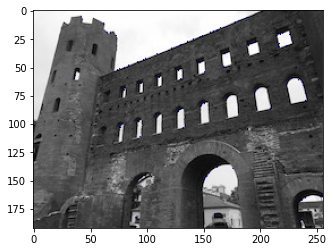

In [7]:
img = cv2.imread('../thorino.jpg').astype(np.float32)

out = Hessian_corner(img)

plt.imshow(out)
cv2.imwrite('out81.jpg', out)

True

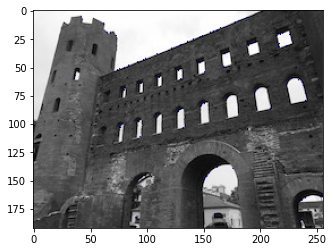

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hessian corner detection
def Hessian_corner(img):

	## Grayscale
	def BGR2GRAY(img):
		gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
		gray = gray.astype(np.uint8)
		return gray

	## Sobel
	def Sobel_filtering(gray):
		# get shape
		H, W = gray.shape

		# sobel kernel
		sobely = np.array(((1, 2, 1),
						(0, 0, 0),
						(-1, -2, -1)), dtype=np.float32)

		sobelx = np.array(((1, 0, -1),
						(2, 0, -2),
						(1, 0, -1)), dtype=np.float32)

		# padding
		tmp = np.pad(gray, (1, 1), 'edge')

		# prepare
		Ix = np.zeros_like(gray, dtype=np.float32)
		Iy = np.zeros_like(gray, dtype=np.float32)

		# get differential
		for y in range(H):
			for x in range(W):
				Ix[y, x] = np.mean(tmp[y : y  + 3, x : x + 3] * sobelx)
				Iy[y, x] = np.mean(tmp[y : y + 3, x : x + 3] * sobely)
			
		Ix2 = Ix ** 2
		Iy2 = Iy ** 2
		Ixy = Ix * Iy

		return Ix2, Iy2, Ixy

		

	## Hessian
	def corner_detect(gray, Ix2, Iy2, Ixy):
		# get shape
		H, W = gray.shape

		# prepare for show detection
		out = np.array((gray, gray, gray))
		out = np.transpose(out, (1,2,0))

		# get Hessian value
		Hes = np.zeros((H, W))

		for y in range(H):
			for x in range(W):
				Hes[y,x] = Ix2[y,x] * Iy2[y,x] - Ixy[y,x] ** 2

		## Detect Corner and show
		for y in range(H):
			for x in range(W):
				if Hes[y,x] == np.max(Hes[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) and Hes[y, x] > np.max(Hes) * 0.1:
					out[y, x] = [0, 0, 255]

		out = out.astype(np.uint8)

		return out

	
	# 1. grayscale
	gray = BGR2GRAY(img)

	# 2. get difference image
	Ix2, Iy2, Ixy = Sobel_filtering(gray)

	# 3. corner detection
	out = corner_detect(gray, Ix2, Iy2, Ixy)

	return out


# Read image
img = cv2.imread("../thorino.jpg").astype(np.float32)

# Hessian corner detection
out = Hessian_corner(img)

plt.imshow(out)
cv2.imwrite('out81.jpg', out)